In [1]:
list_of_packages <- c("ggplot2", "dplyr", "tidyr", "circlize","arrow", "ggrepel")
for (package in list_of_packages) {
    suppressPackageStartupMessages(
        suppressWarnings(
            library(
                package,
                character.only = TRUE,
                quietly = TRUE,
                warn.conflicts = FALSE
            )
        )
    )
}

In [2]:
# Get the current working directory and find Git root
find_git_root <- function() {
    # Get current working directory
    cwd <- getwd()

    # Check if current directory has .git
    if (dir.exists(file.path(cwd, ".git"))) {
        return(cwd)
    }

    # If not, search parent directories
    current_path <- cwd
    while (dirname(current_path) != current_path) {  # While not at root
        parent_path <- dirname(current_path)
        if (dir.exists(file.path(parent_path, ".git"))) {
            return(parent_path)
        }
        current_path <- parent_path
    }

    # If no Git root found, stop with error
    stop("No Git root directory found.")
}

# Find the Git root directory
root_dir <- find_git_root()
cat("Git root directory:", root_dir, "\n")



Git root directory: /home/lippincm/Documents/GFF_3D_organoid_profiling_pipeline 


In [3]:
figures_path <- file.path("../figures/mAP")
if (!dir.exists(figures_path)) {
  dir.create(figures_path, recursive = TRUE)
}

In [4]:
organoid_fs_intra_patient_mAP_file <- file.path(
    root_dir,
    "5.EDA/results/mAP/organoid_fs_intra_patient_mAP.parquet"
)
organoid_fs_inter_patient_mAP_file <- file.path(
    root_dir,
    "5.EDA/results/mAP/sc_fs_inter_patient_mAP.parquet"
)
sc_fs_intra_patient_mAP_file <- file.path(
    root_dir,
    "5.EDA/results/mAP/sc_fs_intra_patient_mAP.parquet"
)
sc_fs_inter_patient_mAP_file <- file.path(
    root_dir,
    "5.EDA/results/mAP/sc_fs_inter_patient_mAP.parquet"
)
organoid_fs_intra_patient_mAP_df <- arrow::read_parquet(
    organoid_fs_intra_patient_mAP_file
)
organoid_fs_inter_patient_mAP_df <- arrow::read_parquet(
    organoid_fs_inter_patient_mAP_file
)
sc_fs_intra_patient_mAP_df <- arrow::read_parquet(
    sc_fs_intra_patient_mAP_file
)
sc_fs_inter_patient_mAP_df <- arrow::read_parquet(
    sc_fs_inter_patient_mAP_file
)

# plot paths
organoid_fs_intra_patient_mAP_plot_path <- file.path(
    figures_path,
    "organoid_fs_intra_patient_mAP.png"
)
organoid_fs_inter_patient_mAP_plot_path <- file.path(
    figures_path,
    "organoid_fs_inter_patient_mAP.png"
)
sc_fs_intra_patient_mAP_plot_path <- file.path(
    figures_path,
    "sc_fs_intra_patient_mAP.png"
)
sc_fs_inter_patient_mAP_plot_path <- file.path(
    figures_path,
    "sc_fs_inter_patient_mAP.png"
)


## mAP Plots

Warning message:
“ggrepel: 16 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 21 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 14 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 16 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 14 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 15 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 16 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 7 unlabeled

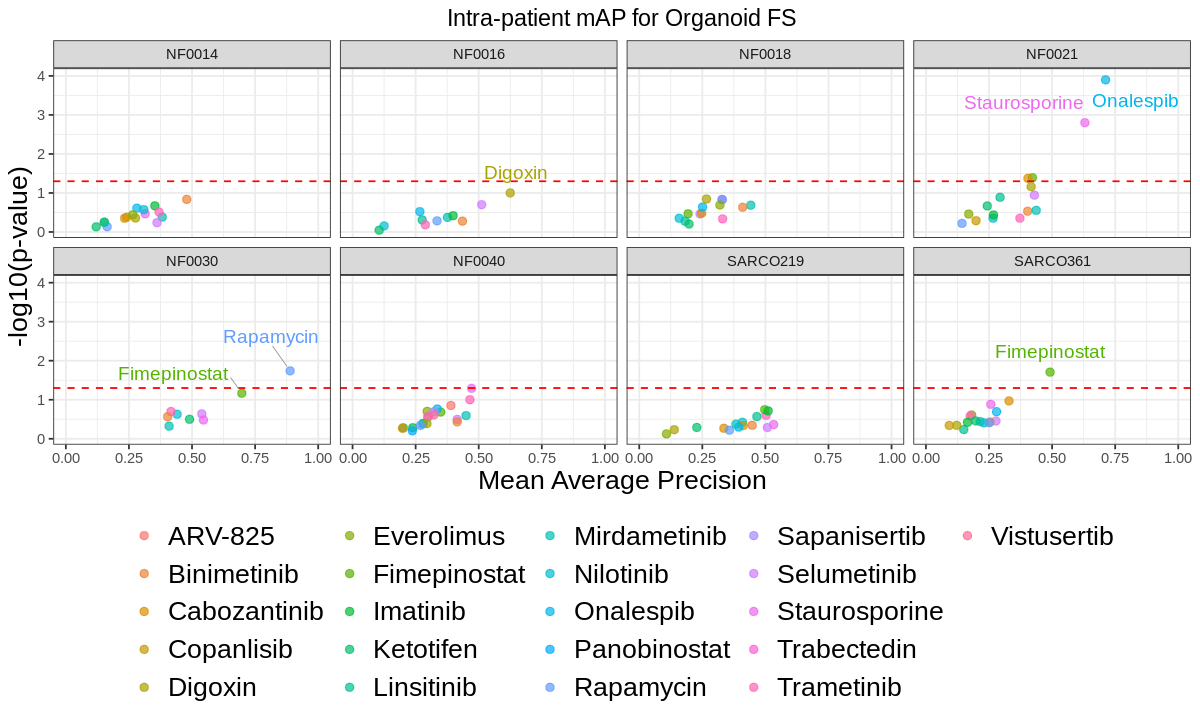

In [5]:
width <- 10
height <- 6
options(repr.plot.width = width, repr.plot.height = height)
organoid_intra_plot <- (
    ggplot(data = organoid_fs_intra_patient_mAP_df,
    aes(
        x = mean_average_precision,
        y = `-log10(p-value)`,
        color = treatment
    )) 
    + geom_point(size = 2, alpha = 0.7)
    + labs(
        x = "Mean Average Precision",
        y = "-log10(p-value)",
        title = "Intra-patient mAP for Organoid FS"
    )
    + geom_hline(yintercept = 1.3, linetype = "dashed", color = "red")  # Adjust threshold as needed
    + theme_bw()
    + theme(
        plot.title = element_text(hjust = 0.5, size = 14),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        legend.position = "bottom",
        legend.title = element_blank(),
        legend.text = element_text(size = 16)
    )
    + xlim(0, 1)
    + facet_wrap(~patient, ncol = 4, 
    # scales = "free"
    )
        + geom_text_repel(
        aes(
            label = treatment
        ),
        size = 4,
        nudge_y = 0.1,
        show.legend = FALSE,
        segment.color = "grey50",
        segment.size = 0.2,
        box.padding = 0.5,
        point.padding = 0.5,
        max.overlaps = 10   
    )
)
ggsave(
    filename = organoid_fs_intra_patient_mAP_plot_path,
    plot = organoid_intra_plot,
    width = width,
    height = height,
    dpi = 600
)
organoid_intra_plot

Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


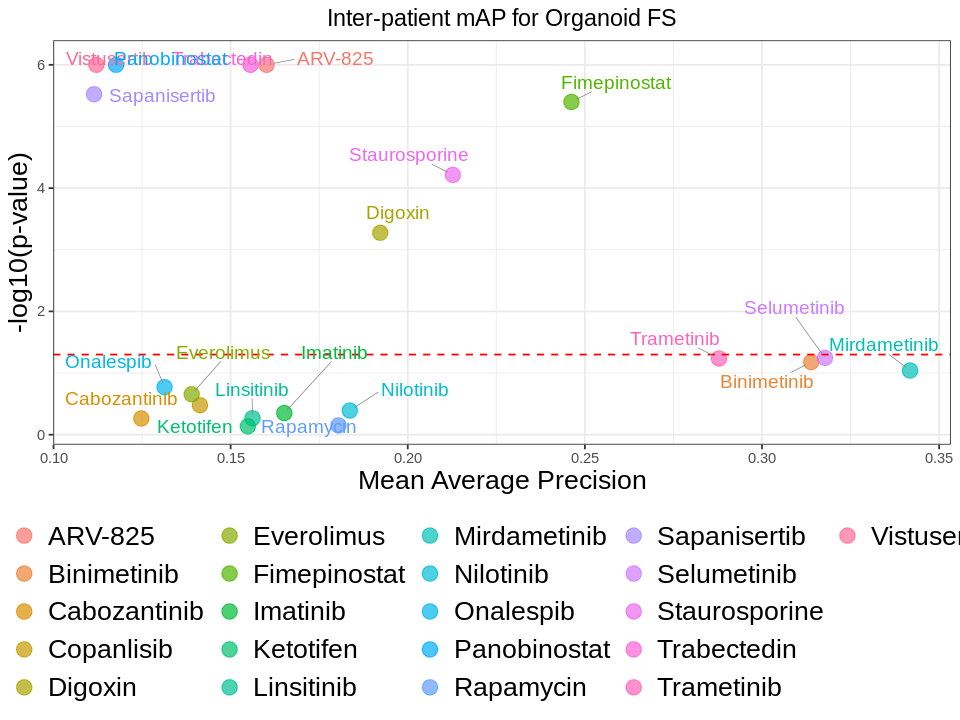

In [6]:
width <- 8
height <- 6
options(repr.plot.width = width, repr.plot.height = height)
organoid_inter_plot <- (
    ggplot(data = organoid_fs_inter_patient_mAP_df,
    aes(
        x = mean_average_precision,
        y = `-log10(p-value)`,
        color = treatment
    )) 
    + geom_point(size = 4, alpha = 0.7)
    + labs(
        x = "Mean Average Precision",
        y = "-log10(p-value)",
        title = "Inter-patient mAP for Organoid FS"
    )
    + geom_hline(yintercept = 1.3, linetype = "dashed", color = "red")  # Adjust threshold as needed
    + theme_bw()
    + theme(
        plot.title = element_text(hjust = 0.5, size = 14),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        legend.position = "bottom",
        legend.title = element_blank(),
        legend.text = element_text(size = 16)
    )
        + geom_text_repel(
        aes(
            label = treatment
        ),
        size = 4,
        nudge_y = 0.1,
        show.legend = FALSE,
        segment.color = "grey50",
        segment.size = 0.2,
        box.padding = 0.5,
        point.padding = 0.5,
        max.overlaps = 10   
    )
)
ggsave(
    filename = organoid_fs_inter_patient_mAP_plot_path,
    plot = organoid_inter_plot,
    width = width,
    height = height,
    dpi = 600
)
organoid_inter_plot

Warning message:
“ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 16 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 15 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 7 unlabele

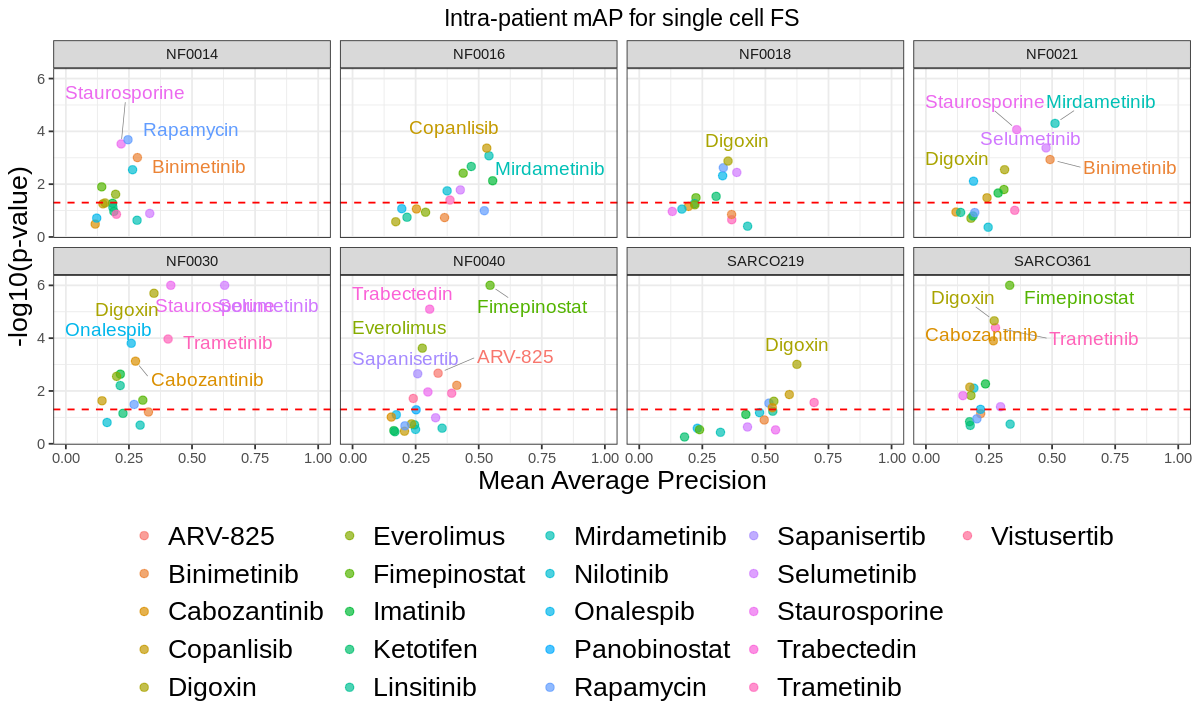

In [7]:
width <- 10
height <- 6
options(repr.plot.width = width, repr.plot.height = height)
sc_intra_plot <- (
    ggplot(data = sc_fs_intra_patient_mAP_df,
    aes(
        x = mean_average_precision,
        y = `-log10(p-value)`,
        color = treatment
    )) 
    + geom_point(size = 2, alpha = 0.7)
    + labs(
        x = "Mean Average Precision",
        y = "-log10(p-value)",
        title = "Intra-patient mAP for single cell FS"
    )
    + geom_hline(yintercept = 1.3, linetype = "dashed", color = "red")  # Adjust threshold as needed
    + theme_bw()
    + theme(
        plot.title = element_text(hjust = 0.5, size = 14),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        legend.position = "bottom",
        legend.title = element_blank(),
        legend.text = element_text(size = 16)
    )
    + xlim(0, 1)
    + facet_wrap(~patient, ncol = 4, 
    # scales = "free"
    )
        + geom_text_repel(
        aes(
            label = treatment
        ),
        size = 4,
        nudge_y = 0.1,
        show.legend = FALSE,
        segment.color = "grey50",
        segment.size = 0.2,
        box.padding = 0.5,
        point.padding = 0.5,
        max.overlaps = 10   
    )
)
ggsave(
    filename = sc_fs_intra_patient_mAP_plot_path,
    plot = sc_intra_plot,
    width = width,
    height = height,
    dpi = 600
)
sc_intra_plot

Warning message:
“ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


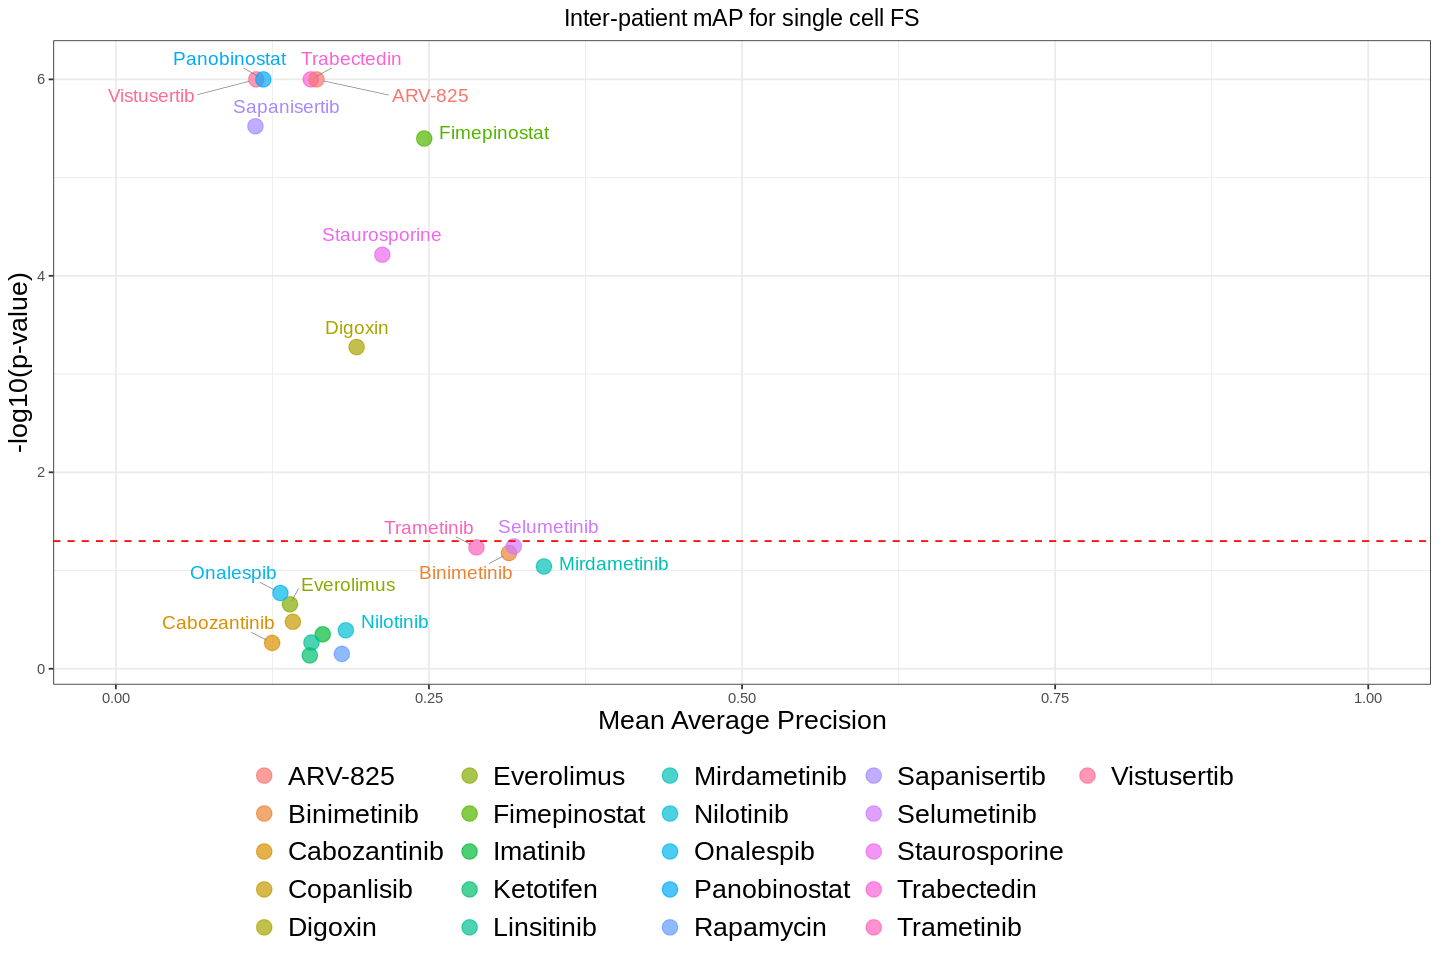

In [8]:
width <- 12
height <- 8
options(repr.plot.width = width, repr.plot.height = height)
sc_inter_plot <- (
    ggplot(data = sc_fs_inter_patient_mAP_df,
    aes(
        x = mean_average_precision,
        y = `-log10(p-value)`,
        color = treatment
    )) 
    + geom_point(size = 4, alpha = 0.7)
    + labs(
        x = "Mean Average Precision",
        y = "-log10(p-value)",
        title = "Inter-patient mAP for single cell FS"
    )
    + geom_hline(yintercept = 1.3, linetype = "dashed", color = "red")  # Adjust threshold as needed
    + theme_bw()
    + theme(
        plot.title = element_text(hjust = 0.5, size = 14),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        legend.position = "bottom",
        legend.title = element_blank(),
        legend.text = element_text(size = 16)
    )
    + xlim(0, 1)
    + geom_text_repel(
        aes(
            label = treatment
        ),
        size = 4,
        nudge_y = 0.1,
        show.legend = FALSE,
        segment.color = "grey50",
        segment.size = 0.2,
        box.padding = 0.5,
        point.padding = 0.5,
        max.overlaps = 10   
    )

)
ggsave(
    filename = sc_fs_inter_patient_mAP_plot_path,
    plot = sc_inter_plot,
    width = width,
    height = height,
    dpi = 600
)
sc_inter_plot

## Inter vs Intra Patient mAP for Organoid and Single Cell FS

In [9]:
organoid_fs_intra_patient_mAP_df <- select(organoid_fs_intra_patient_mAP_df,
    c(
        treatment,mean_average_precision, patient
    )
)
colnames(organoid_fs_intra_patient_mAP_df)[2] <- "intra_patient_mAP"


organoid_fs_inter_patient_mAP_df <- select(organoid_fs_inter_patient_mAP_df, 
    c(
        treatment, mean_average_precision
    )
)
# rename mean_average_precision to inter_patient_mAP
colnames(organoid_fs_inter_patient_mAP_df)[2] <- "inter_patient_mAP"
# rename mean_average_precision to intra_patient_mAP
# combine intra and inter patient mAP for organoid
# merge the two dataframes on treatment and shuffle
organoid_sc_fs_mAP_df <- merge(
    organoid_fs_intra_patient_mAP_df,
    organoid_fs_inter_patient_mAP_df,
    by = c("treatment"),
    all = TRUE
)

In [10]:
organoid_sc_fs_mAP_df$intra_to_inter_ratio <- (
    organoid_sc_fs_mAP_df$intra_patient_mAP /
    organoid_sc_fs_mAP_df$inter_patient_mAP
)
head(organoid_sc_fs_mAP_df)

,treatment,intra_patient_mAP,patient,inter_patient_mAP,intra_to_inter_ratio
,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,ARV-825,0.3896802,NF0040,0.1601300,2.433524
2,Binimetinib,0.4030984,NF0021,0.3138821,1.284235
3,Binimetinib,0.4033189,NF0030,0.3138821,1.284937
4,Binimetinib,0.4477139,SARCO219,0.3138821,1.426376
5,Binimetinib,0.4789736,NF0014,0.3138821,1.525966
6,Binimetinib,0.4356008,NF0016,0.3138821,1.387785


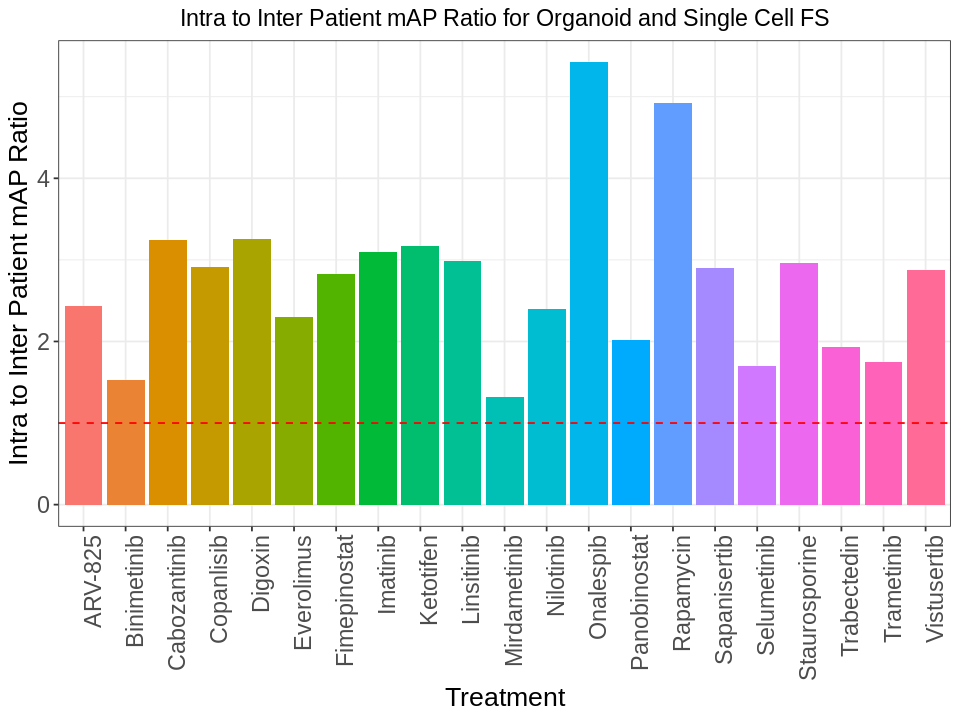

In [11]:
width <- 8
height <- 6
options(repr.plot.width = width, repr.plot.height = height) 
ratio_plot <- (
    ggplot(
        data = organoid_sc_fs_mAP_df,
        aes(
            x = treatment,
            y = intra_to_inter_ratio,
            fill = treatment
        )
    )
    + geom_bar(stat = "identity", position = "dodge")
    + labs(
        x = "Treatment",
        y = "Intra to Inter Patient mAP Ratio",
        title = "Intra to Inter Patient mAP Ratio for Organoid and Single Cell FS"
    )
    + theme_bw()
    + theme(
        plot.title = element_text(hjust = 0.5, size = 14),
        axis.text.x = element_text(angle = 90, hjust = 1, size = 14),
        axis.text.y = element_text(size = 14),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        legend.position = "none", 
        legend.title = element_blank(),
        legend.text = element_text(size = 16),
    )
    + geom_hline(
        yintercept = 1,
        linetype = "dashed",
        color = "red"
    )  # Adjust threshold as needed

)
ggsave(
    filename = file.path(figures_path, "intra_to_inter_patient_mAP_ratio_bar.png"),
    plot = ratio_plot,
    width = width,
    height = height,
    dpi = 600
)   
ratio_plot

Warning message:
“ggrepel: 85 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 90 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


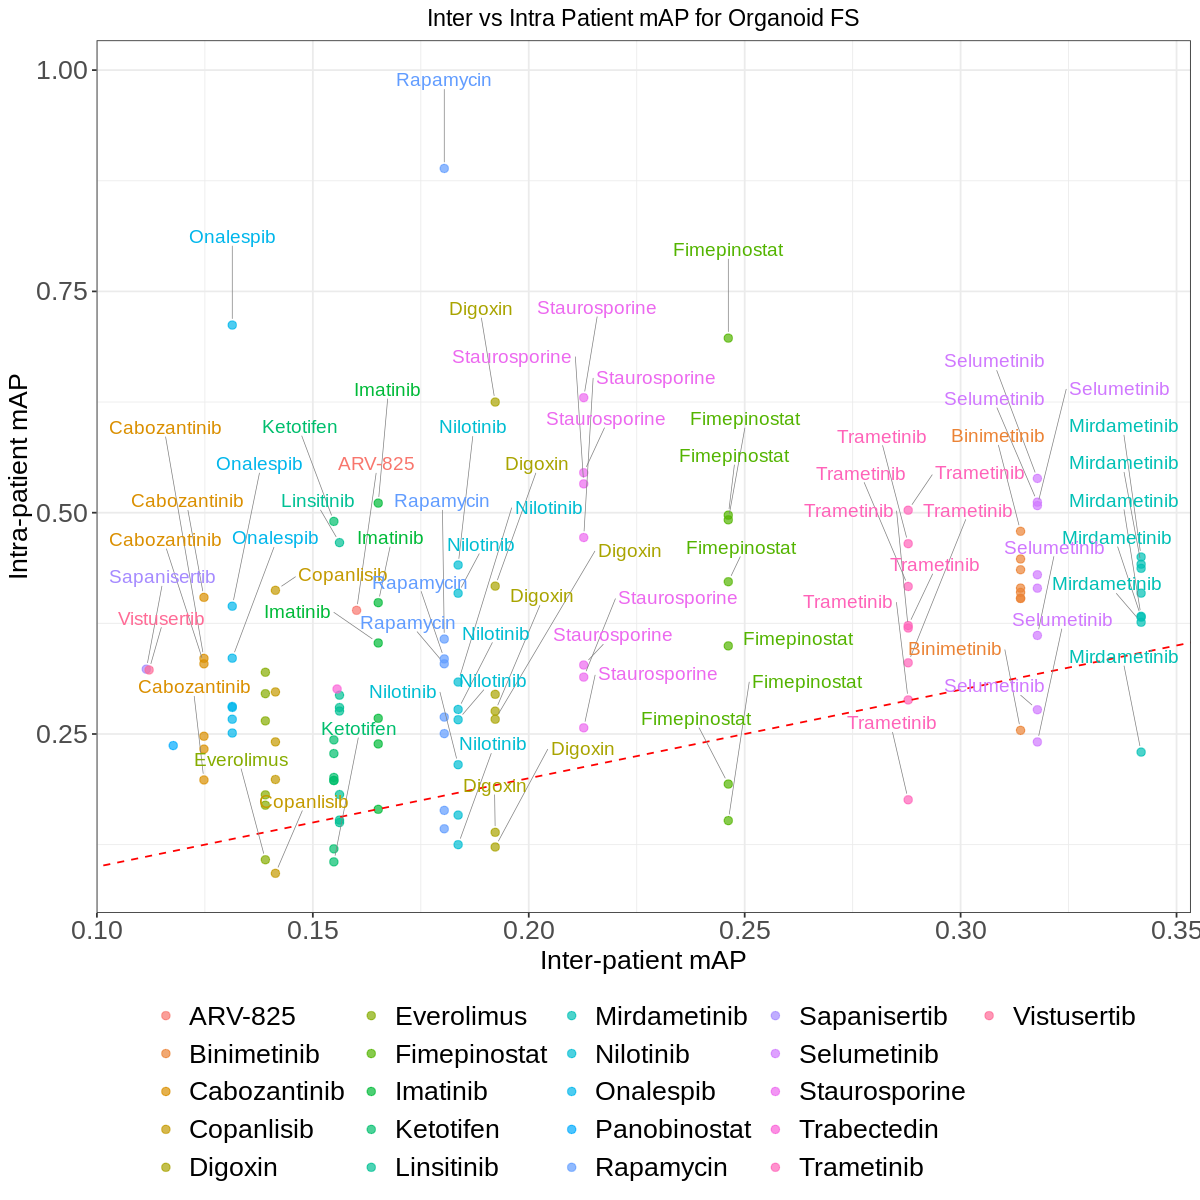

In [12]:
width <- 10
height <- 10
options(repr.plot.width = width, repr.plot.height = height)
plot <- (
    ggplot(
        data = organoid_sc_fs_mAP_df,
        aes(
            x = inter_patient_mAP,
            y = intra_patient_mAP,
            color = treatment,
            label = treatment
                    )
    )
    + geom_point(size = 2, alpha = 0.7)
    # + geom_boxplot(
    #     aes(fill = treatment),
    #     alpha = 0.4,
    #     size = 5,
    #     outlier.shape = NA,
    #     jitter = TRUE,
    #     position = position_dodge(width = 0.75)
    # )
    + labs(
        x = "Inter-patient mAP",
        y = "Intra-patient mAP",
        title = "Inter vs Intra Patient mAP for Organoid FS"
    )
    # + ylim(0, 1)
    # + xlim(0, 1)
    + geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red")  # Diagonal line
    + theme_bw()
    + theme(
        plot.title = element_text(hjust = 0.5, size = 14),
        axis.text.x = element_text(size = 16),
        axis.text.y = element_text(size = 16),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        legend.position = "bottom",
        legend.title = element_blank(),
        legend.text = element_text(size = 16)
    )
        + geom_text_repel(
        aes(
            label = treatment
        ),
        size = 4,
        nudge_y = 0.1,
        show.legend = FALSE,
        segment.color = "grey50",
        segment.size = 0.2,
        box.padding = 0.5,
        point.padding = 0.5,
        max.overlaps = 10   
    )
)
ggsave(
    filename = file.path(figures_path, "organoid_fs_mAP_inter_vs_intra.png"),
    plot = plot,
    width = 10,
    height = 6,
    dpi = 600
)   
plot

In [13]:
file_path <- file.path(
    root_dir,
    "5.EDA/results/distance_metrics/organoid_consensus_inter_patient_distance_metrics.parquet"
)
organoid_consensus_inter_patient_distance_metrics_df <- arrow::read_parquet(
    file_path
)

head(organoid_consensus_inter_patient_distance_metrics_df)

treatment,euclidean_distance_mean,euclidean_distance_std,cosine_distance_mean,cosine_distance_std,correlation_distance_mean,correlation_distance_std
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Binimetinib,7.997106,2.674086,0.7991282,0.2023200,0.7943016,0.2047405
Cabozantinib,7.396124,2.538046,0.7059160,0.1554443,0.7197001,0.1634799
Copanlisib,9.137716,5.318666,0.8051540,0.2061788,0.8158741,0.1872796
Digoxin,10.029175,5.612215,0.8349236,0.1955660,0.8647702,0.1940726
Everolimus,7.216772,1.318755,0.7831907,0.2084541,0.7877833,0.2107552
Fimepinostat,11.043875,8.132849,0.8901730,0.1666827,0.9108187,0.1865874


Warning message:
“ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


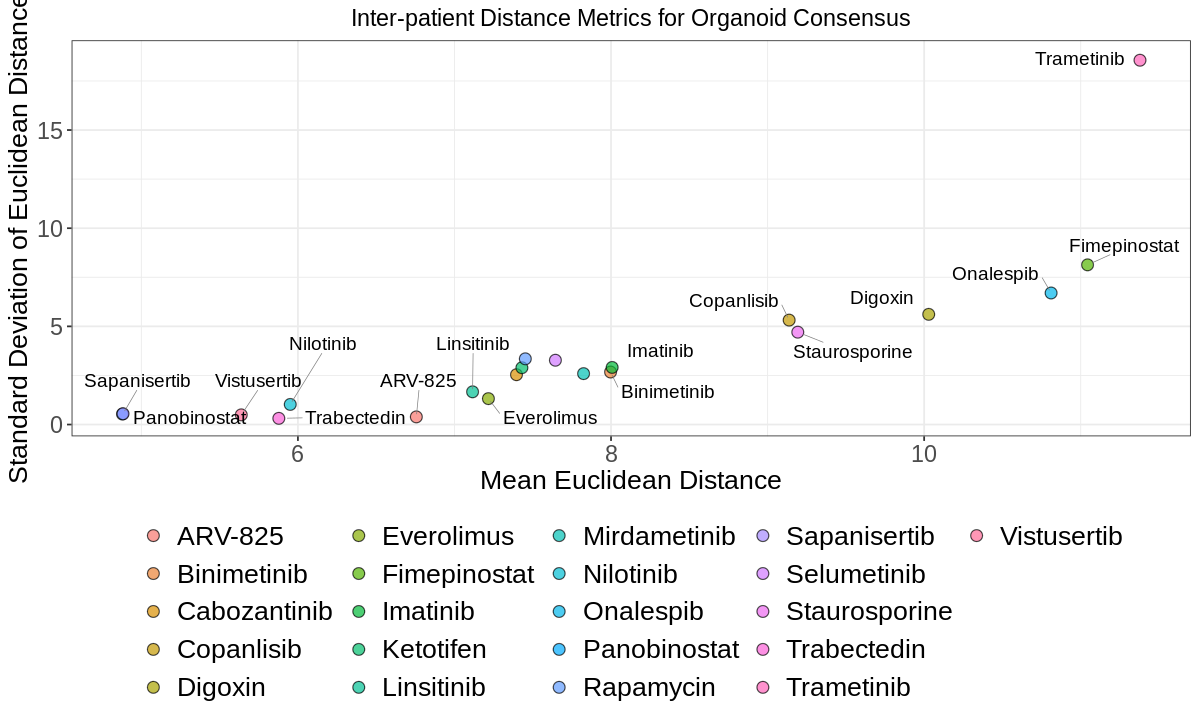

In [14]:
width <- 10
height <- 6
options(repr.plot.width = width, repr.plot.height = height)
plot <- (ggplot(
    data = organoid_consensus_inter_patient_distance_metrics_df,
    aes(x = euclidean_distance_mean, y = euclidean_distance_std, fill = treatment, label = treatment)
    
)
    + geom_point(size = 3, shape = 21, alpha = 0.7)
    + labs(
        x = "Mean Euclidean Distance",
        y = "Standard Deviation of Euclidean Distance",
        title = "Inter-patient Distance Metrics for Organoid Consensus"
    )
    + theme_bw()
    + theme(
        plot.title = element_text(hjust = 0.5, size = 14),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        legend.position = "bottom", 
        legend.title = element_blank(),
        legend.text = element_text(size = 16)
    )
        + geom_text_repel(
        aes(
            label = treatment
        ),
        size = 4,
        nudge_y = 0.1,
        show.legend = FALSE,
        segment.color = "grey50",
        segment.size = 0.2,
        box.padding = 0.5,
        point.padding = 0.5,
        max.overlaps = 10   
    )
)
ggsave(
    filename = file.path(figures_path, "organoid_consensus_inter_patient_distance_metrics.png"),
    plot = plot,
    width = 10,
    height = 6,
    dpi = 600
)
plot

In [15]:
file_path <- file.path(
    root_dir,
    "5.EDA/results/distance_metrics/organoid_consensus_intra_patient_distance_metrics.parquet"
)
organoid_consensus_intra_patient_distance_metrics_df <- arrow::read_parquet(
    file_path
)

head(organoid_consensus_intra_patient_distance_metrics_df)


patient,treatment,euclidean_distance_mean,euclidean_distance_std,cosine_distance_mean,cosine_distance_std,correlation_distance_mean,correlation_distance_std
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NF0014,Binimetinib,14.497953,0.5331349,0.9097358,0.0801442,0.9030712,0.0744141
NF0014,Cabozantinib,13.938781,0.0000000,0.8966827,0.0000000,0.8783605,0.0000000
NF0014,Copanlisib,11.643352,0.0000000,0.8636682,0.0000000,0.8237172,0.0000000
NF0014,Digoxin,24.829779,0.0000000,1.1180103,0.0000000,1.1030240,0.0000000
NF0014,Everolimus,9.580574,0.0000000,0.7045502,0.0000000,0.6957713,0.0000000
NF0014,Fimepinostat,32.482128,0.0000000,1.1113232,0.0000000,1.0943738,0.0000000


Warning message:
“ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 1 unlabeled data p

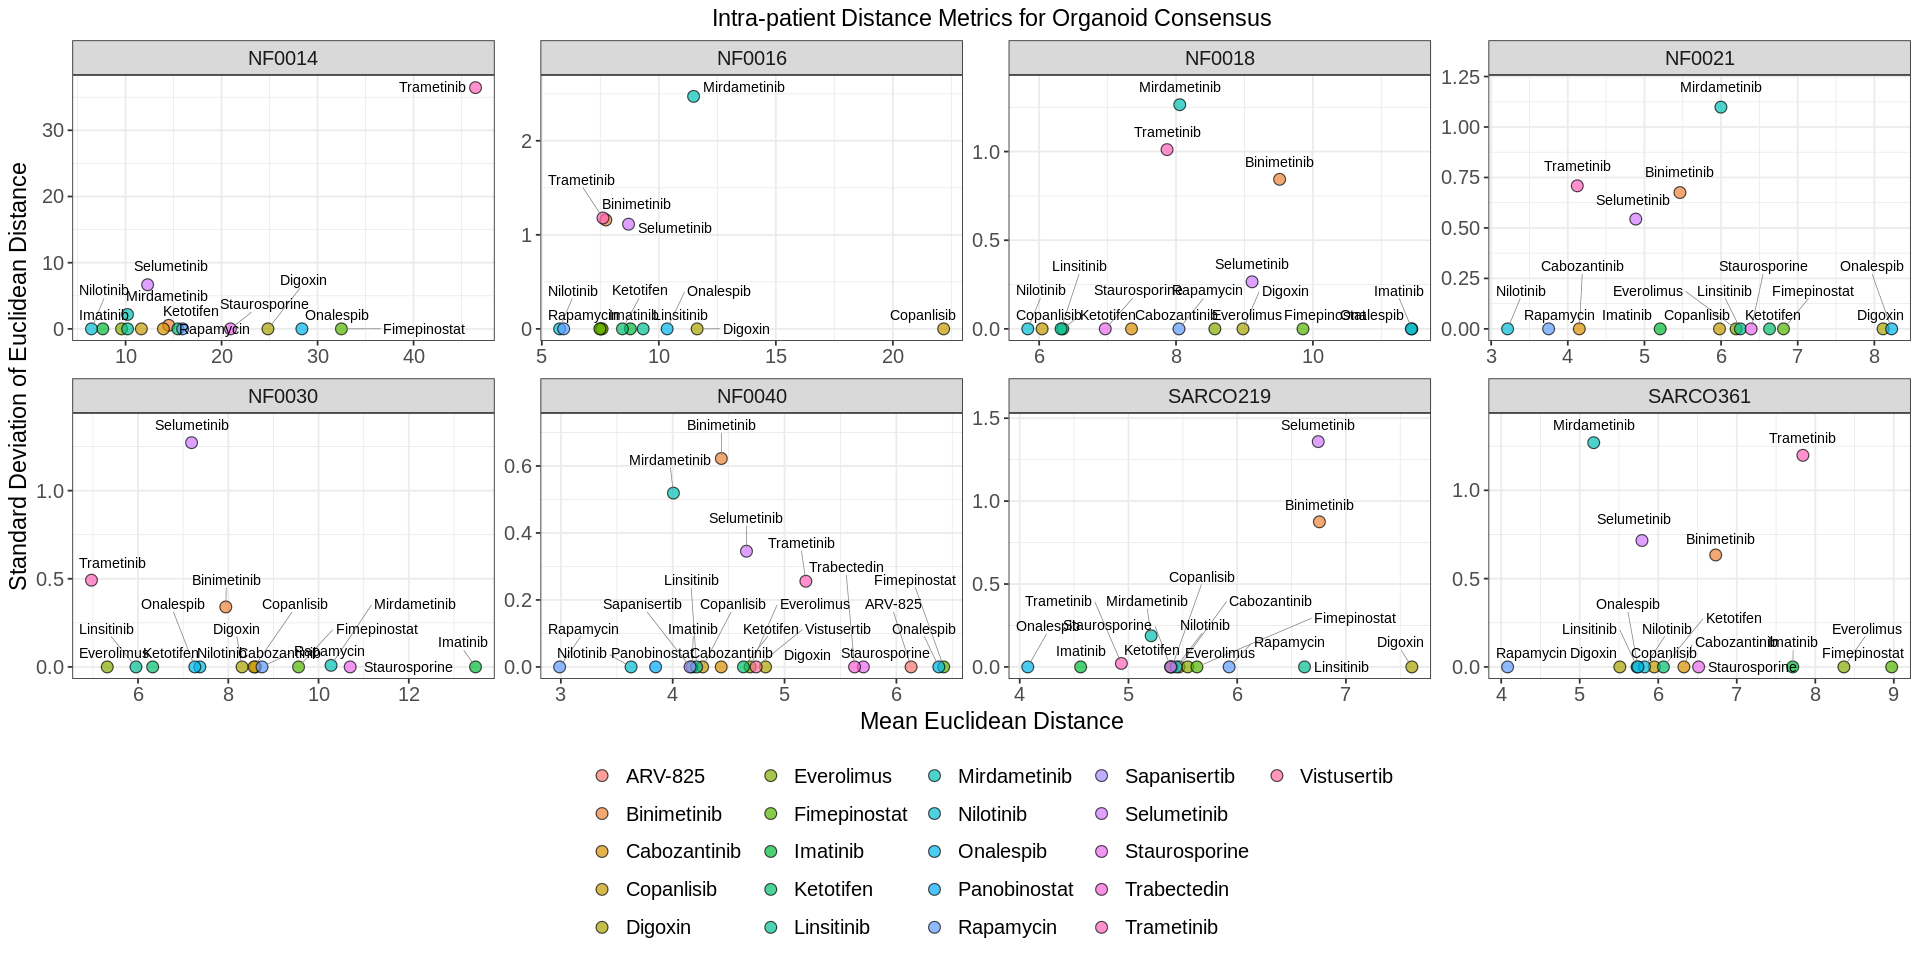

In [20]:
width <- 16
height <- 8
options(repr.plot.width = width, repr.plot.height = height)
plot <- (ggplot(
    data = organoid_consensus_intra_patient_distance_metrics_df,
    aes(x = euclidean_distance_mean, y = euclidean_distance_std, fill = treatment, label = treatment)
    
)
    + geom_point(size = 3, shape = 21, alpha = 0.7)
    + labs(
        x = "Mean Euclidean Distance",
        y = "Standard Deviation of Euclidean Distance",
        title = "Intra-patient Distance Metrics for Organoid Consensus"
    )
    + theme_bw()
    + theme(
        plot.title = element_text(hjust = 0.5, size = 14),
        axis.text.x = element_text(size = 12),
        axis.text.y = element_text(size = 12),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        legend.position = "bottom", 
        legend.title = element_blank(),
        legend.text = element_text(size = 12),
        strip.text = element_text(size = 12)
    )
        + geom_text_repel(
        aes(
            label = treatment
        ),
        size = 3,
        nudge_y = 0.1,
        show.legend = FALSE,
        segment.color = "grey50",
        segment.size = 0.2,
        box.padding = 0.3,
        point.padding = 0.3,
        max.overlaps = 15
    )
    + facet_wrap(~patient, ncol = 4,
    scales = "free"   
    )
)
ggsave(
    filename = file.path(figures_path, "organoid_consensus_intra_patient_distance_metrics.png"),
    plot = plot,
    width = 10,
    height = 6,
    dpi = 600
)
plot